# Glucose Response Analysis

In [1]:
# Setup and imports

import sys
import os
from pathlib import Path

# Get the project root (one level up from notebooks directory)
project_root = Path.cwd().parent
print(f"Project root: {project_root}")

# Add project root to Python path
sys.path.append(str(project_root))

# Change working directory to project root
os.chdir(project_root)
print(f"Changed working directory to: {os.getcwd()}")

# Verify the data file exists now
data_file = Path("data/raw/hall2018.csv")
print(f"Data file exists: {data_file.exists()}")
print(f"Looking for file at: {data_file.absolute()}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data.data_preprocessor import HallDataPreprocessor
from src.data.data_loader import HallDataLoader
from src.models.glucose_response_analyzer import GlucoseResponseAnalyzer
from src.visualization.plotting import GlucosePlotter

# Load and explore data
loader = HallDataLoader()
df_hall, df_meals = loader.load_all_data()

Project root: /Users/philipp.dubach/Projects/glucose-response-analysis
Changed working directory to: /Users/philipp.dubach/Projects/glucose-response-analysis
Data file exists: True
Looking for file at: /Users/philipp.dubach/Projects/glucose-response-analysis/data/raw/hall2018.csv


In [2]:
# Preprocess data
preprocessor = HallDataPreprocessor()
df_meals_processed = preprocessor.preprocess_all(df_hall, df_meals)

print(f"Data after preprocessing: {df_meals_processed.shape}")
print(f"Number of meals marked: {df_meals_processed['meal_taken'].sum()}")

# Initialize analyzer and fit curves
analyzer = GlucoseResponseAnalyzer()
plotter = GlucosePlotter()

# Fit all meals
df_fitted_params = analyzer.fit_all_meals(df_meals_processed)

print(f"Successfully fitted {len(df_fitted_params)} meals")
print("\nFitted parameters summary:")
print(df_fitted_params[['A', 'delta', 'sigma', 'baseline']].describe())

/Users/philipp.dubach/Projects/glucose-response-analysis/src/data/data_preprocessor.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_meals = grouped.apply(mark_meal_time).reset_index(drop=True)


Data after preprocessing: (3899, 8)
Number of meals marked: 112
Successfully fitted 112 meals

Fitted parameters summary:
                A       delta       sigma    baseline
count  112.000000  112.000000  112.000000  112.000000
mean    35.351688   64.891688   19.897304   84.562500
std     20.434512   31.208147   13.165921   13.728813
min      0.000000    0.003000    5.000000   57.000000
25%     19.686250   44.959750   11.398500   75.375000
50%     31.045000   57.068000   16.306000   84.250000
75%     47.979000   72.214500   22.031000   91.625000
max     92.803000  150.000000   60.000000  132.000000


(<Figure size 1800x1500 with 4 Axes>,
 array([[<Axes: title={'center': 'Distribution of Amplitude (A)'}, xlabel='Amplitude (A) (mg/dL)', ylabel='Density'>,
         <Axes: title={'center': 'Distribution of Time to Peak (δ)'}, xlabel='Time to Peak (δ) (min)', ylabel='Density'>],
        [<Axes: title={'center': 'Distribution of Curve Width (σ)'}, xlabel='Curve Width (σ) (min)', ylabel='Density'>,
         <Axes: title={'center': 'Distribution of Baseline (b)'}, xlabel='Baseline (b) (mg/dL)', ylabel='Density'>]],
       dtype=object))

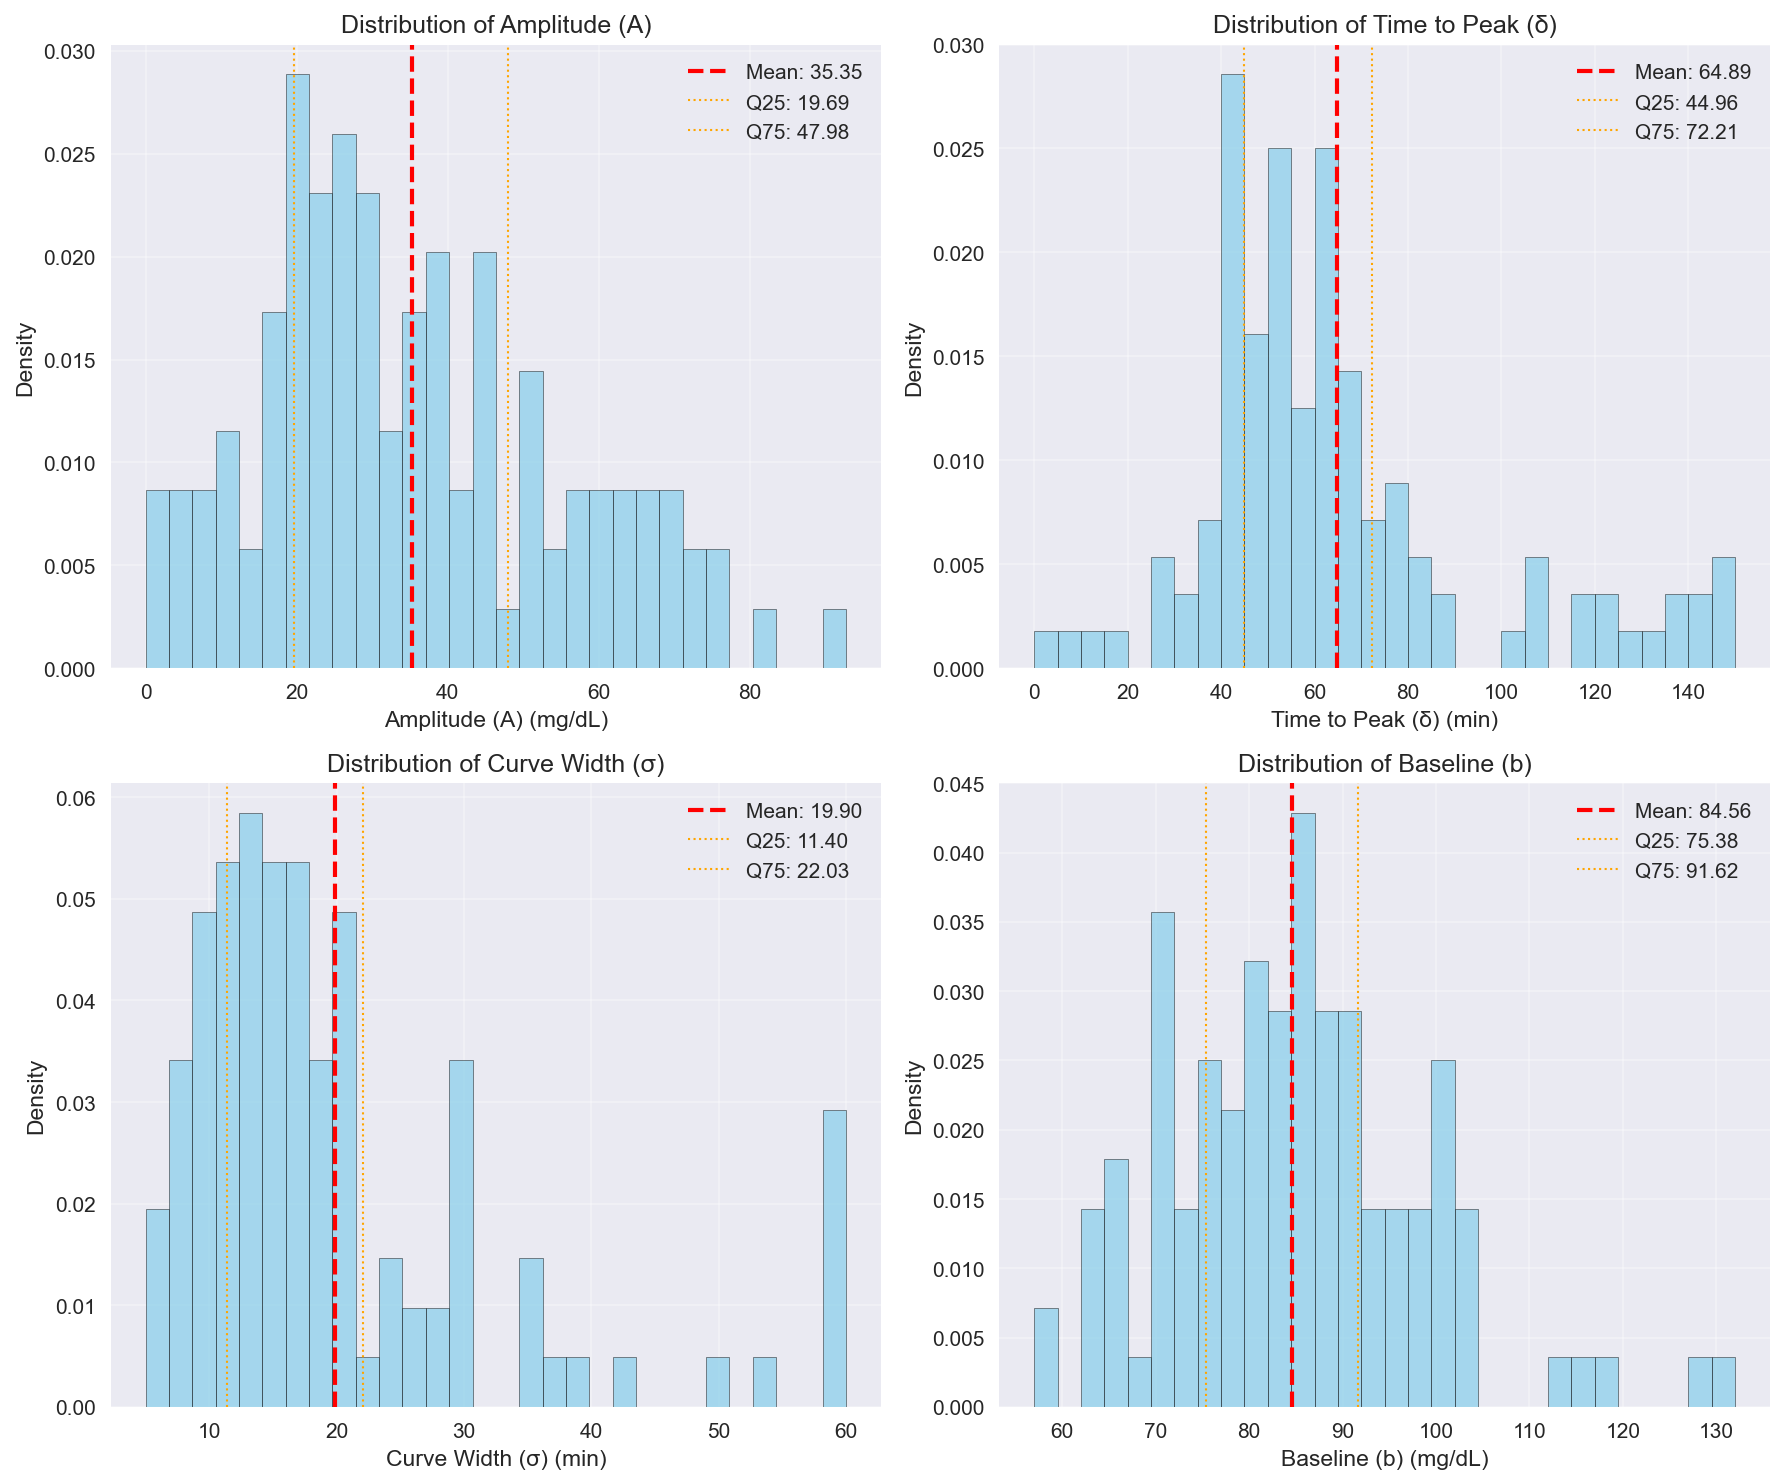

In [3]:
# Visualize parameter distributions
plotter.plot_parameter_distributions(df_fitted_params)

R-squared distribution:
count    112.000000
mean       0.441243
std        0.635209
min       -3.420800
25%        0.314250
50%        0.657800
75%        0.835600
max        0.967900
Name: r_squared, dtype: float64


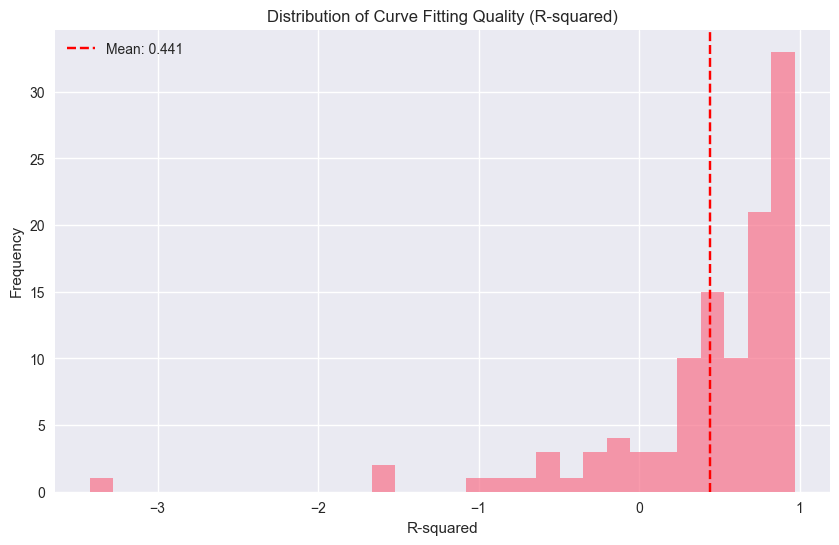

In [4]:
# Quality assessment
print("R-squared distribution:")
print(df_fitted_params['r_squared'].describe())

# Plot R-squared distribution
plt.figure(figsize=(10, 6))
plt.hist(df_fitted_params['r_squared'], bins=30, alpha=0.7)
plt.xlabel('R-squared')
plt.ylabel('Frequency')
plt.title('Distribution of Curve Fitting Quality (R-squared)')
plt.axvline(df_fitted_params['r_squared'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df_fitted_params["r_squared"].mean():.3f}')
plt.legend()
plt.show()

/Users/philipp.dubach/Projects/glucose-response-analysis/src/visualization/plotting.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(


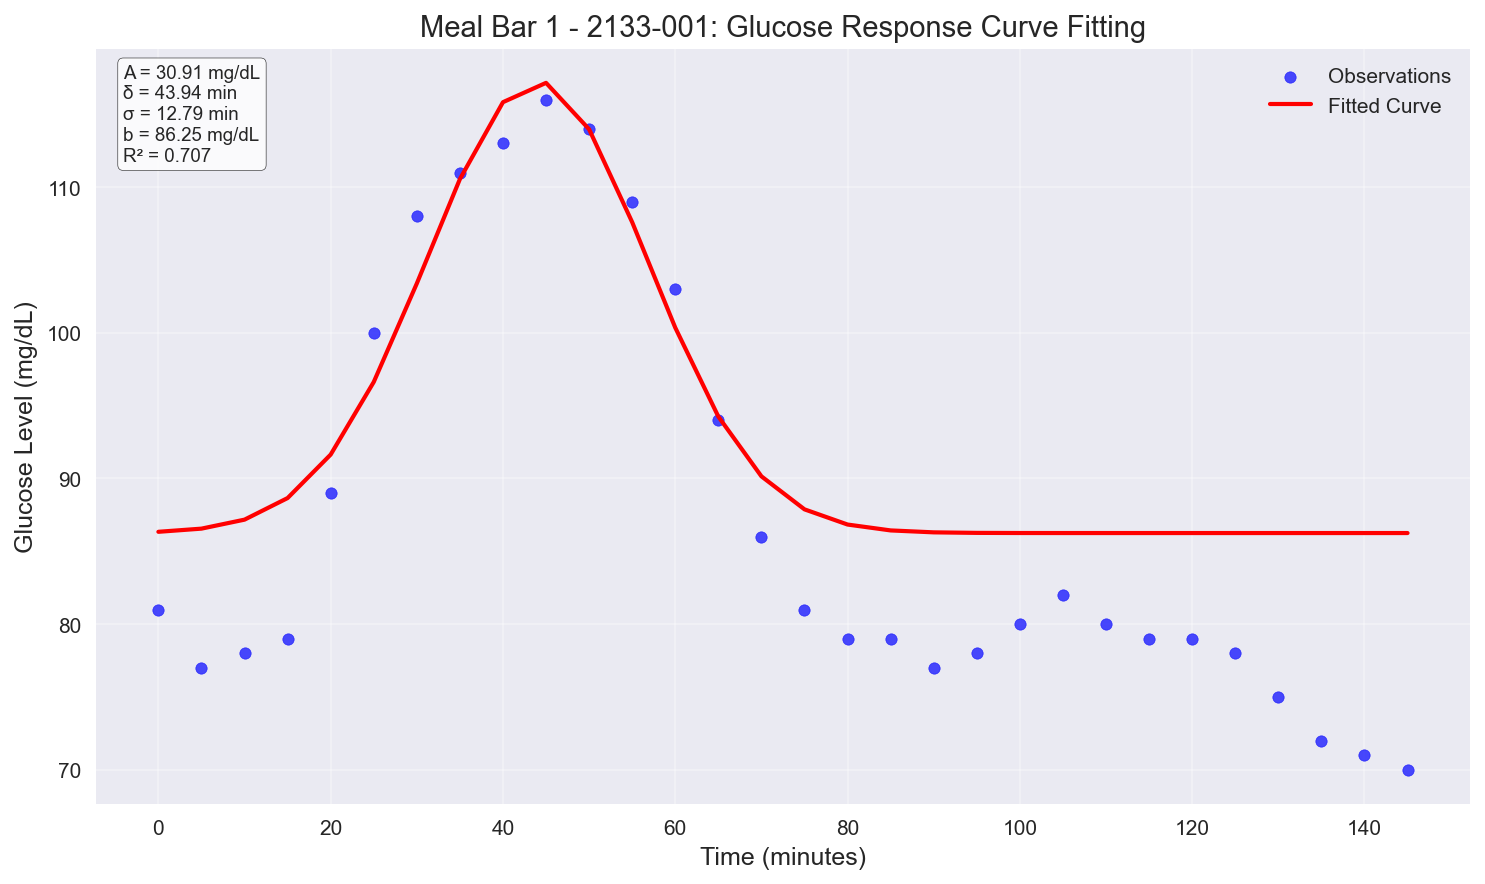

/Users/philipp.dubach/Projects/glucose-response-analysis/src/visualization/plotting.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(


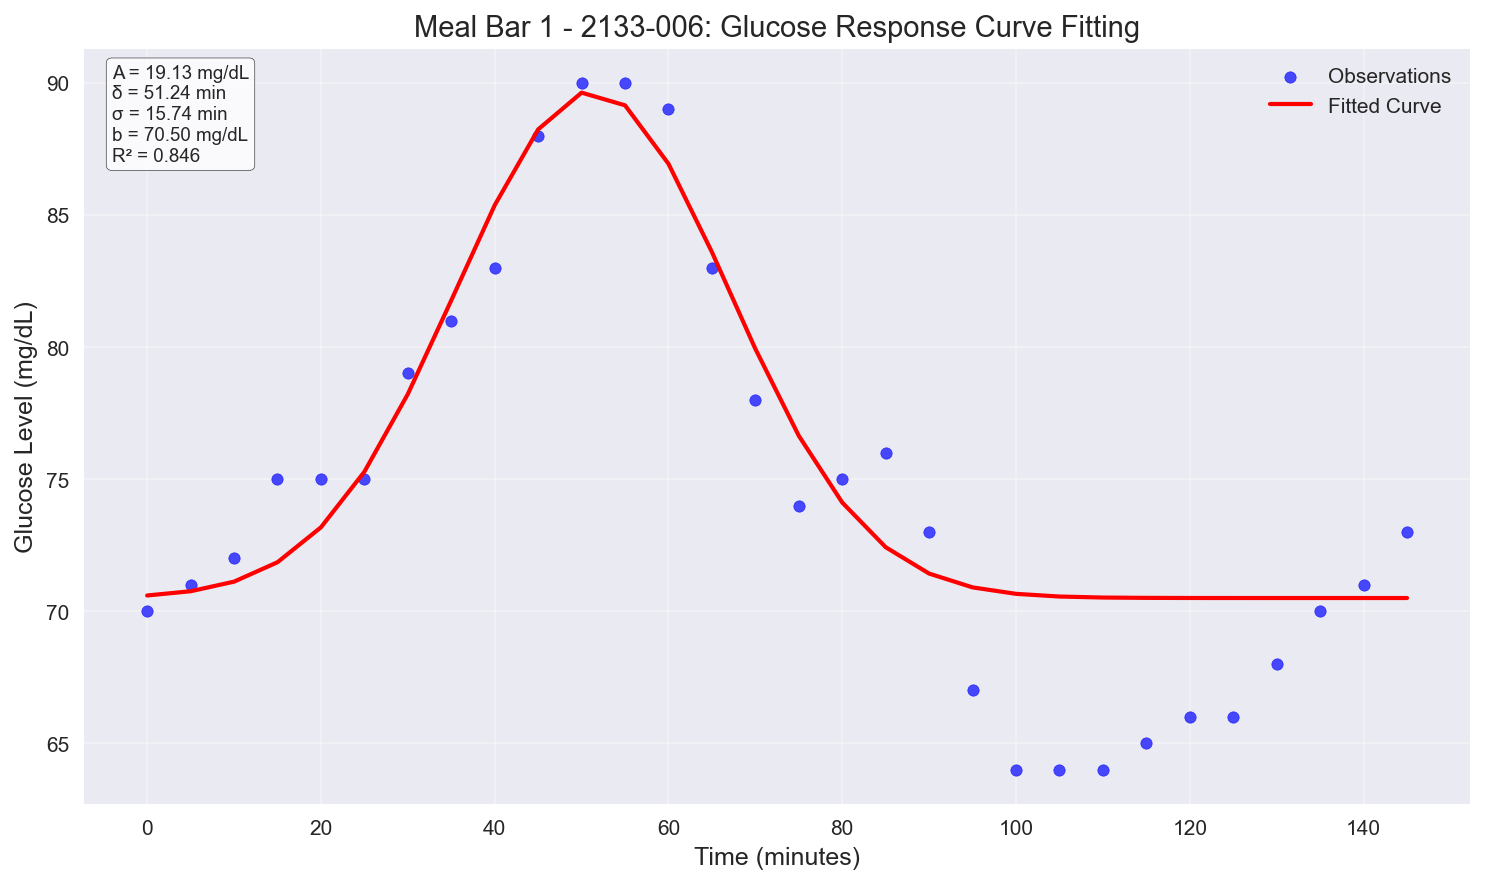

/Users/philipp.dubach/Projects/glucose-response-analysis/src/visualization/plotting.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(


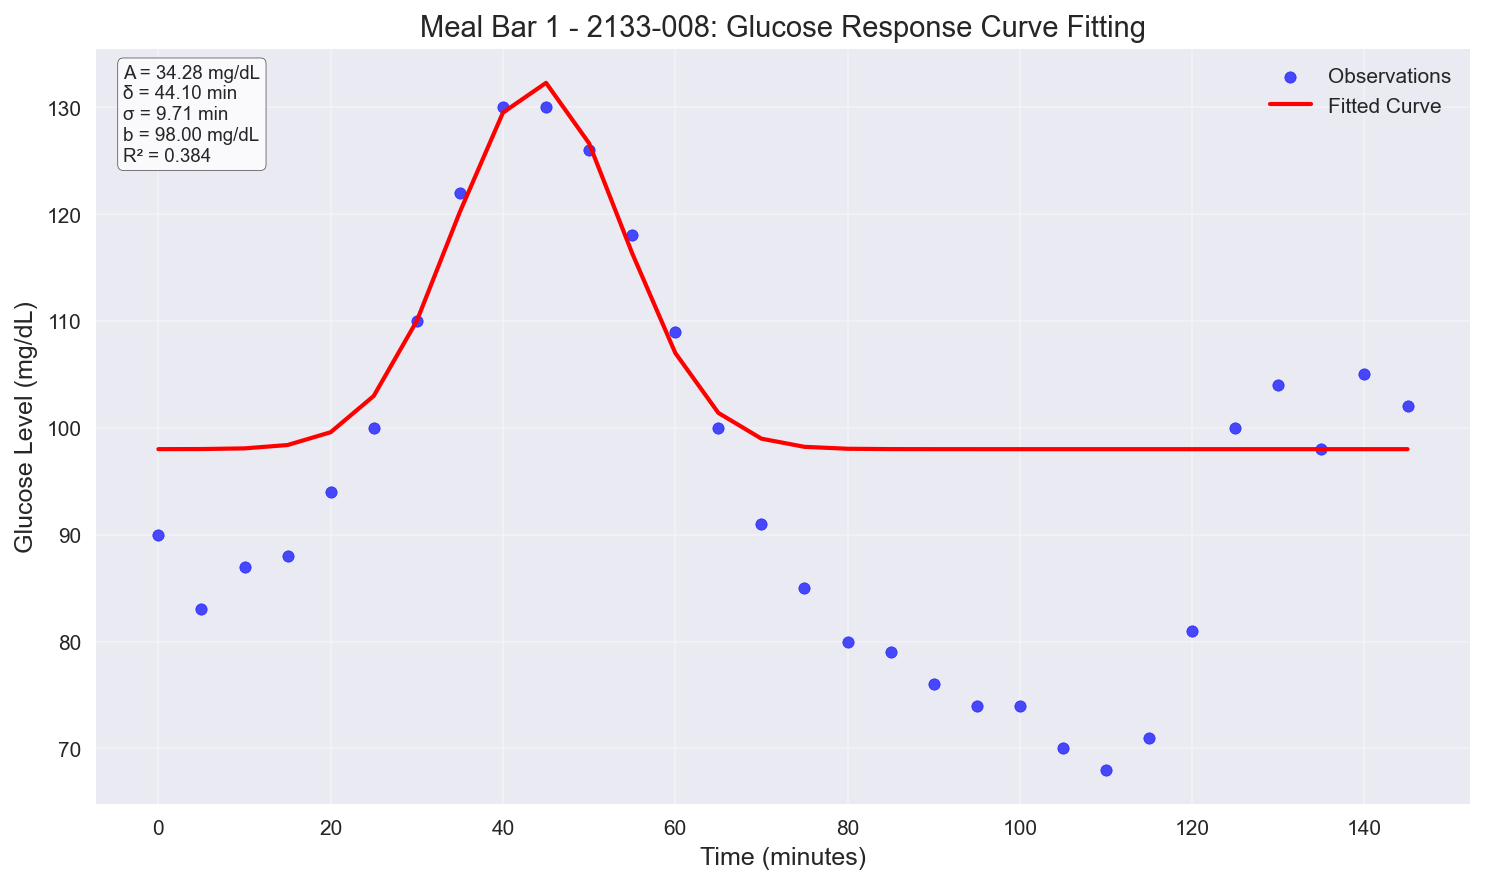

/Users/philipp.dubach/Projects/glucose-response-analysis/src/visualization/plotting.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(


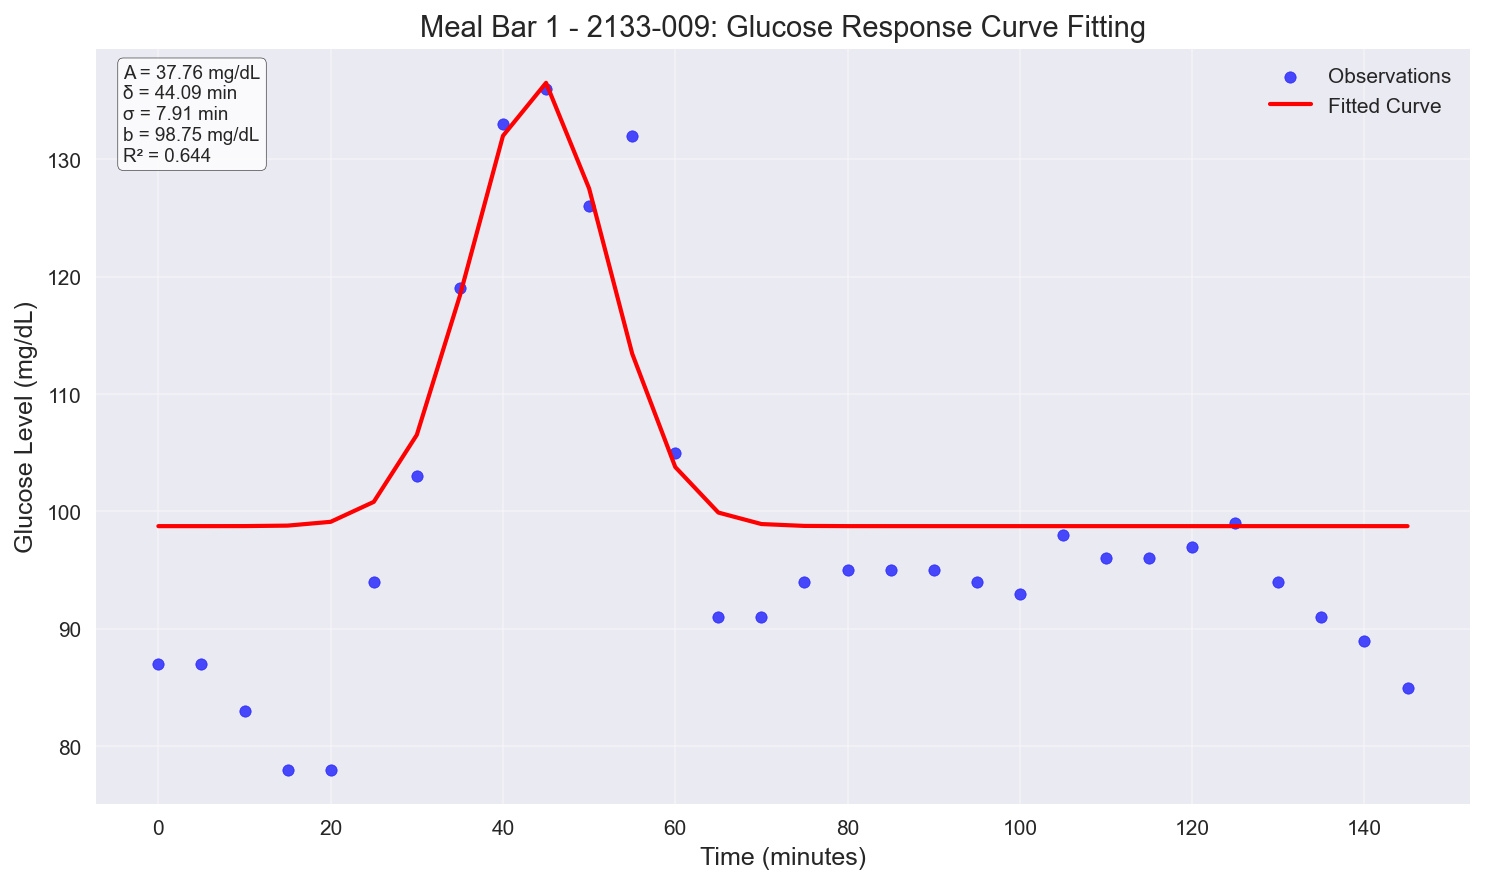

/Users/philipp.dubach/Projects/glucose-response-analysis/src/visualization/plotting.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(


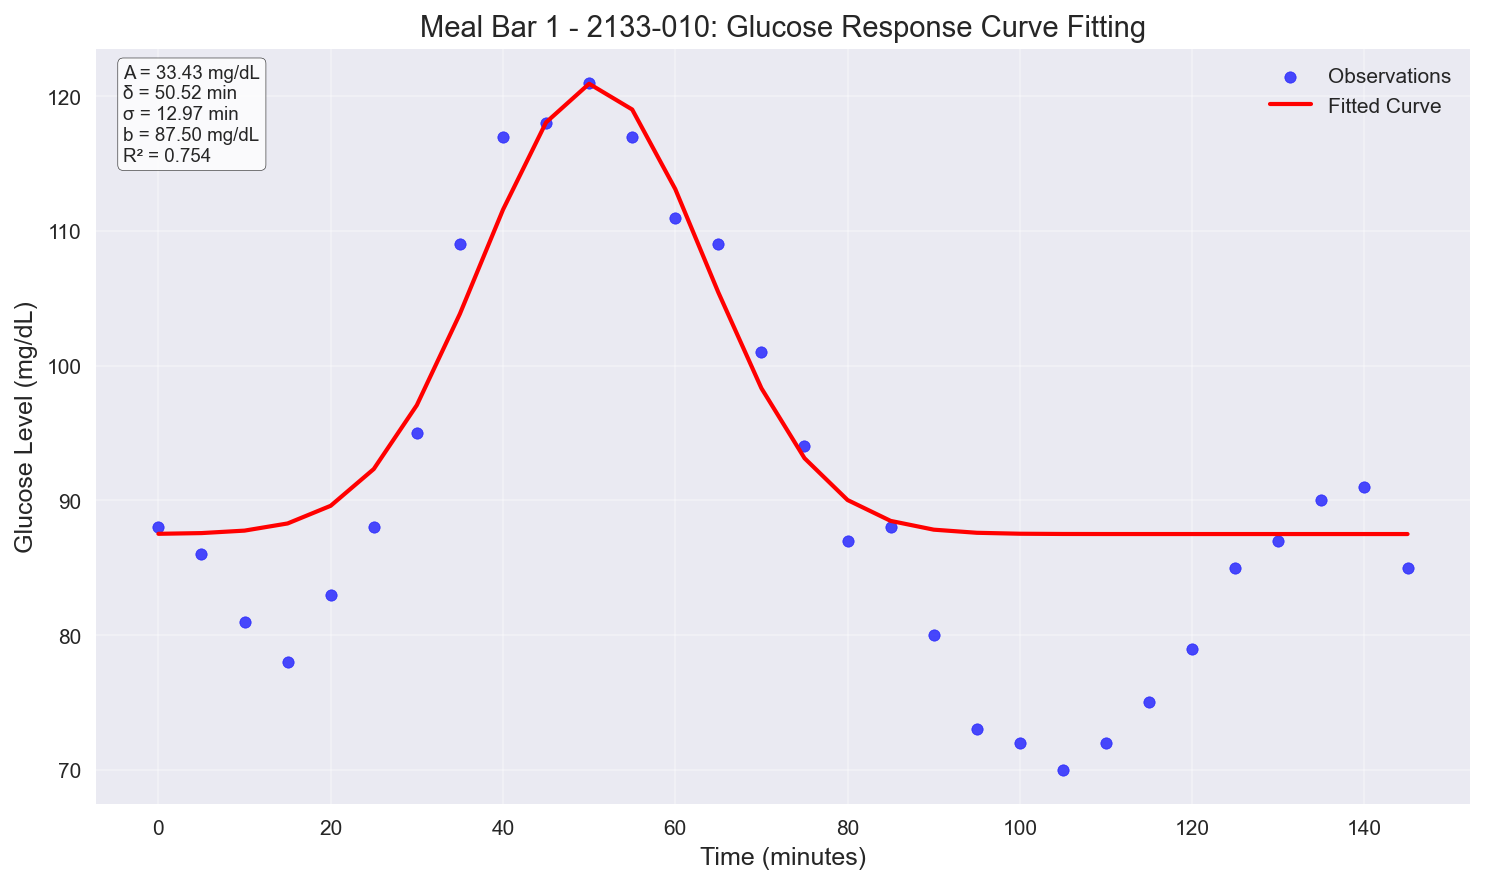

In [5]:
# Example curve fits
# Show a few example curve fits
meal_indices = df_meals_processed[df_meals_processed['meal_taken'] == 1].index[:5]

for i, meal_idx in enumerate(meal_indices):
    result = analyzer.fit_single_meal(df_meals_processed, meal_idx)
    if result['success']:
        plotter.plot_glucose_curve_fit(result, i+1)
        plt.show()